**Google Colab**

Help: cmd + ctrl + m + h
Comment/ uncommenent: ctrl+ cmd + /

**PARALLELS:**
- These are imaginary lines with an east-west direction.
- The parallel that is taken as a reference is the **Equator (0º)** that divides the Earth into two hemispheres, the northern and the southern.
- We will draw the parallels towards the northern and southern hemisphere making lines parallel to the equator.
- There are two important parallels, in the **Northern hemisphere the Tropic of Cancer** and in the **Southern Hemisphere the Tropic of Capricorn**.
- Tropic of Cancer: **23º north** (above the equator)
- Tropic of Capricorn: **23º south** (below the equator)
- Between these two, that entire strip, there is 80% of the planet's biodiversity, a lot of water is produced, and the planet's temperature is regulated because it captures a lot of CO2.

**MERIDIANS:**
- They are imaginary lines in a north-south direction, which join the poles (north pole and south pole).
- The **Greenwich meridian (0º)** is the one taken as a reference.
- Divides the world into the Eastern Hemisphere (East) (right side) and the Western Hemisphere (West) (left side).


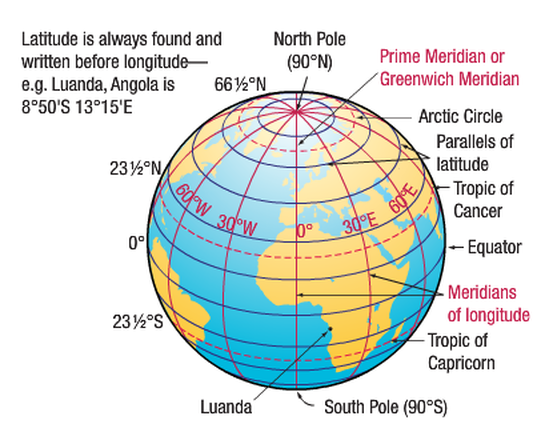
Comment out line or block: ctrl + cmd + /


Scenario: SSP1 - RCP 2.6

In [1]:
# Reading .nc files from Colab/Thesis

# Importing libraries
import os
# Mount Google Drive (if you want to access files from Google Drive)
from google.colab import drive
drive.mount('/content/drive')
# Set the desired working directory
os.chdir('/content/drive/My Drive/Thesis')
# Verify the current working directory
print("Current working directory:", os.getcwd())

Mounted at /content/drive
Current working directory: /content/drive/My Drive/Thesis


In [2]:
!ls

 first_tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc
 mexico.json
 script_clean_nc_files.ipynb
'Temperature fluctuations in Mexico: Scenario: SSP1 - RCP 2.6.csv'


In [3]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.4 MB/s eta 0:00:00


In [4]:
# Importing libraries for data analysis
from netCDF4 import num2date
from netCDF4 import Dataset
import datetime
import pandas as pd
import pandas as pd
import numpy as np

In [5]:
# Importing libraries for netcdf_file
from scipy.io import netcdf_file
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc

# Reading .nc file: 'NETCDF3_CLASSIC'
ncFileName = 'first_tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc'
fileFormat = 'NETCDF3_CLASSIC'
modeType   = 'r'
ssp1_df = nc.Dataset(ncFileName, mode=modeType, format=fileFormat)
# Printing
#ssp1_df

In [6]:
# Printing information of interest
print(f"• Title: {ssp1_df.title}\n• Frequency: {ssp1_df.frequency}\n• Institution: {ssp1_df.institution}\n• Table ID: {ssp1_df.table_id}\n• Institution ID: {ssp1_df.institution_id}\n• Institution: {ssp1_df.institution}\n• Experiment: {ssp1_df.experiment}\n• Experiment ID: {ssp1_df.experiment_id}\n• Activity ID: {ssp1_df.activity_id}\n• MIP Era: {ssp1_df.mip_era}\n• Variable ID: {ssp1_df.variable_id}\n• Further Info: {ssp1_df.further_info_url}")

• Title: NOAA GFDL GFDL-ESM4 model output prepared for CMIP6 low-end scenario reaching 1.9 W m-2, based on SSP1
• Frequency: mon
• Institution: National Oceanic and Atmospheric Administration, Geophysical Fluid Dynamics Laboratory, Princeton, NJ 08540, USA
• Table ID: Amon
• Institution ID: NOAA-GFDL
• Institution: National Oceanic and Atmospheric Administration, Geophysical Fluid Dynamics Laboratory, Princeton, NJ 08540, USA
• Experiment: low-end scenario reaching 1.9 W m-2, based on SSP1
• Experiment ID: ssp119
• Activity ID: ScenarioMIP
• MIP Era: CMIP6
• Variable ID: tas
• Further Info: https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GFDL-ESM4.ssp119.none.r1i1p1f1


In [7]:
# Printing dimensions
ssp1_df.dimensions

{'bnds': <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 288,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1032}

In [8]:
# Printing variables
ssp1_df.variables

{'bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 bnds(bnds)
     long_name: vertex number
 unlimited dimensions: 
 current shape = (2,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'height': <class 'netCDF4._netCDF4.Variable'>
 float64 height()
     long_name: height
     units: m
     missing_value: 1e+20
     _FillValue: 1e+20
     cell_methods: time: point scalar_axis: mean
     axis: Z
     positive: up
     standard_name: height
     description: ~2 m standard surface air temperature and surface humidity  height
 unlimited dimensions: 
 current shape = ()
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     long_name: latitude
     units: degrees_north
     axis: Y
     bounds: lat_bnds
     standard_name: latitude
     cell_methods: time: point
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_bnds(lat, bnds)

In [9]:
#!pip install --upgrade netcdf4

Cleaning Latitude

In [10]:
# Storing values in lat_values
lat_values = ssp1_df.variables['lat'][:]
# Converting to the format ranging from -90° to 90°
lat_values_formatted = [(float(lat_val) if float(lat_val) <= 90 else float(lat_val) - 360) for lat_val in lat_values]
# Parsing into a pandas dataframe
lat_df = pd.DataFrame(lat_values_formatted)
# Renaming column
lat_df = lat_df.rename(columns={0: 'Latitude'})
# Printing
lat_df.head()

,Latitude
0,-89.5
1,-88.5
2,-87.5
3,-86.5
4,-85.5


Cleaning Longitude

In [11]:
# Storing values in lon_values
lon_values = ssp1_df.variables['lon'][:]
# Converting to the format ranging from -180° to 180°
lon_values_formatted = [(float(lon_val) if float(lon_val) <= 180 else float(lon_val) - 360) for lon_val in lon_values]
# Parsing into a pandas dataframe
lon_df = pd.DataFrame(lon_values_formatted)
# Renaming column
lon_df = lon_df.rename(columns={0: 'Longitude'})
# Printing
lon_df.head()

,Longitude
0,0.625
1,1.875
2,3.125
3,4.375
4,5.625


Cleaning Time

In [12]:
# Parsing time values to yyyy-mm-dd

# Storing values in time_values
time_values = ssp1_df.variables['time'][:]
# Converting values to datetime objects
base_date = datetime.datetime(1850, 1, 1, 0, 0, 0)
time_datetimes = [base_date + datetime.timedelta(days=float(time_val)) for time_val in time_values]
# Parsing into a pandas dataframe with the datetime values
time_df = pd.DataFrame({'Time': time_datetimes})
# Cleaning
time_df['Time'] = time_df['Time'].dt.date
time_df = time_df.rename(columns={'Time': 'Date'})
# Drop the first row inplace
#time_df.drop(0, inplace=True)

# Reset index inplace
#time_df.reset_index(drop=True, inplace=True)
# Adjusting the index to start from 1
#time_df.index = time_df.index + 1

# Printing
time_df.tail() # 2100-10-16
time_df.head()

,Date
0,2014-12-07
1,2015-01-06
2,2015-02-04
3,2015-03-07
4,2015-04-06


Cleaning: Near-Surface Air Temperature (tas)

In [13]:
import pandas as pd

# Storing values in tas_values
tas_values = ssp1_df.variables['tas'][:]

# Convert temperature values from Kelvin to Celsius and Fahrenheit using provided formulas
tas_celsius = tas_values - 273.15
tas_fahrenheit = (9/5) * (tas_values - 273.15) + 32

# Take absolute value to remove negative sign
tas_celsius_abs = abs(tas_celsius)
tas_fahrenheit_abs = abs(tas_fahrenheit)

# Creating a DataFrame to store the temperature values
tas_df = pd.DataFrame({
    'Temperature (K)': tas_values.flatten(),
    'Temperature (°C)': tas_celsius_abs.flatten(),
    'Temperature (°F)': tas_fahrenheit_abs.flatten()
})

# Resetting index to start from 1
tas_df.reset_index(drop=True, inplace=True)

# Printing
tas_df.head()

,Temperature (K),Temperature (°C),Temperature (°F)
0,240.853867,32.296127,26.133026
1,240.833038,32.316956,26.170517
2,240.812195,32.337799,26.208038
3,240.791367,32.358627,26.245529
4,240.770523,32.379471,26.283047


Time and Temperature

In [14]:
len(lon_df) # 288
len(lat_df) # 180

180

Latitude and Longitude
- Latitude has 180 values
- Longitude has 288 values: it seems that the longitude values are represented from -180° to 180°, leading to a total of 360 degrees. When you sample these values at a regular interval of 1 degree, you end up with 288 unique longitude values.

In [15]:
#len(time_df) # 1031
#len(lon_df) # 288
len(lat_df) # 180

180

In [16]:
import pandas as pd

# Assuming time_df, lat_df, and lon_df are your DataFrames
# Create a meshgrid of latitude and longitude
lat_lon_meshgrid = pd.merge(lat_df.assign(key=0), lon_df.assign(key=0), on='key').drop('key', axis=1)

# Repeat time_df to match the size of lat_lon_meshgrid
time_df_repeated = pd.concat([time_df]*len(lat_lon_meshgrid), ignore_index=True)

# Concatenate time_df_repeated and lat_lon_meshgrid along the columns
final_ssp1_rcp26_df = pd.concat([time_df_repeated, lat_lon_meshgrid], axis=1)

# Set the column names
final_ssp1_rcp26_df.columns = ['Date', 'Latitude', 'Longitude']

# Print the final DataFrame
final_ssp1_rcp26_df.tail(100)

,Date,Latitude,Longitude
53498780,2092-07-18,NaN,NaN
53498781,2092-08-17,NaN,NaN
53498782,2092-09-17,NaN,NaN
53498783,2092-10-17,NaN,NaN
53498784,2092-11-17,NaN,NaN
...,...,...,...
53498875,2100-06-16,NaN,NaN
53498876,2100-07-17,NaN,NaN
53498877,2100-08-16,NaN,NaN
53498878,2100-09-16,NaN,NaN


In [17]:
final_ssp1_rcp26_df['Latitude'].max() # 89.5
final_ssp1_rcp26_df['Latitude'].min() # -89.5
final_ssp1_rcp26_df['Longitude'].max() # 179.375
final_ssp1_rcp26_df['Longitude'].min() # -179.375

-179.375

Mexico example:

In [18]:
# Given coordinates for Mexico
mexico_lat = 23.6345
mexico_lon = -102.5528  # Note: West longitude is represented as negative values

# Find the closest latitude and longitude grid points in your dataset
closest_lat_idx = np.abs(lat_values - mexico_lat).argmin()
closest_lon_idx = np.abs(lon_values - mexico_lon).argmin()

# Get the corresponding latitude and longitude values from the dataset
closest_lat = lat_values[closest_lat_idx]
closest_lon = lon_values[closest_lon_idx]

# Print the closest latitude and longitude values
print("Closest latitude in dataset:", closest_lat)
print("Closest longitude in dataset:", closest_lon)


Closest latitude in dataset: 23.5
Closest longitude in dataset: 0.625


Geopandas
- Using Geopandas to retrieve a range of latitude and longitude coordinates for the entire landmass of Mexico.

In [19]:
!ls


 first_tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc
 mexico.json
 script_clean_nc_files.ipynb
'Temperature fluctuations in Mexico: Scenario: SSP1 - RCP 2.6.csv'


In [20]:
import geopandas as gpd

# Load the geographic data representing the boundaries of Mexico
mexico_data = gpd.read_file("mexico.json")

# Extract the bounding box of Mexico
minx, miny, maxx, maxy = mexico_data.bounds.values[0]

# Print the latitude and longitude ranges
print("Latitude Range (Min, Max):", (miny, maxy))
print("Longitude Range (Min, Max):", (minx, maxx))


Latitude Range (Min, Max): (21.96212923043772, 22.323232249602576)
Longitude Range (Min, Max): (-102.69348534035967, -102.35384678004931)


In [21]:
import numpy as np

# Given latitude and longitude ranges for Mexico
min_lat, max_lat = 21.96212923043772, 22.323232249602576
min_lon, max_lon = -102.69348534035967, -102.35384678004931

# Find the closest latitude and longitude grid points in the dataset to the specified ranges
closest_min_lat_idx = np.abs(final_ssp1_rcp26_df['Latitude'] - min_lat).argmin()
closest_max_lat_idx = np.abs(final_ssp1_rcp26_df['Latitude'] - max_lat).argmin()
closest_min_lon_idx = np.abs(final_ssp1_rcp26_df['Longitude'] - min_lon).argmin()
closest_max_lon_idx = np.abs(final_ssp1_rcp26_df['Longitude'] - max_lon).argmin()

# Get the corresponding latitude and longitude values from the dataset
closest_min_lat = final_ssp1_rcp26_df['Latitude'].iloc[closest_min_lat_idx]
closest_max_lat = final_ssp1_rcp26_df['Latitude'].iloc[closest_max_lat_idx]
closest_min_lon = final_ssp1_rcp26_df['Longitude'].iloc[closest_min_lon_idx]
closest_max_lon = final_ssp1_rcp26_df['Longitude'].iloc[closest_max_lon_idx]

# Determine the range of latitude and longitude values within Mexico
mexico_lat_range = (closest_min_lat, closest_max_lat)
mexico_lon_range = (closest_min_lon, closest_max_lon)

# Print the range of latitude and longitude values within Mexico
print("Latitude Range within Mexico:", mexico_lat_range)
print("Longitude Range within Mexico:", mexico_lon_range)


Latitude Range within Mexico: (21.5, 22.5)
Longitude Range within Mexico: (-103.125, -101.875)


In [22]:
# Define the latitude and longitude ranges for Mexico
mexico_lat_range = (21.5, 22.5)
mexico_lon_range = (-103.125, -101.875)

# Filter final_ssp1_rcp26_df to include only rows within the specified latitude and longitude ranges
mexico_df = final_ssp1_rcp26_df[
    (final_ssp1_rcp26_df['Latitude'] >= mexico_lat_range[0]) &
    (final_ssp1_rcp26_df['Latitude'] <= mexico_lat_range[1]) &
    (final_ssp1_rcp26_df['Longitude'] >= mexico_lon_range[0]) &
    (final_ssp1_rcp26_df['Longitude'] <= mexico_lon_range[1])
]

# Print the filtered DataFrame
mexico_df.head(50
               )


,Date,Latitude,Longitude
32173,2030-01-02,21.5,-103.125
32174,2030-01-31,21.5,-101.875
32461,2053-12-27,22.5,-103.125
32462,2054-01-25,22.5,-101.875


In [23]:
# lat lon time tas
lat_1 = ssp1_df['lat']
lon_1= ssp1_df['lon']
time_1= ssp1_df['time']
tas_1= ssp1_df['tas']


In [24]:
#type(lat_1) shape = (180,)
#type(lon_1) shape = (288,)
#type(time_1) shape = (1032,)
#type(tas_1) shape = (1032, 180, 288)

# Making an array
lat_1 = ssp1_df['lat'][:] # values from -89.5 to 89.5
lat_1
lon_1 = ssp1_df['lon'][:] # values from 0.625 to 359.375
lon_1
time_1 = ssp1_df['time'][:] # values from 60240.5 to 91599.5
time_1
tas_1 = ssp1_df['tas'][:] # values tanging from aprox. 230 to 250
tas_1

masked_array(
  data=[[[240.85387, 240.83304, 240.8122 , ..., 240.91638, 240.89554,
          240.87471],
         [241.50543, 241.46115, 241.4168 , ..., 241.63788, 241.5938 ,
          241.54965],
         [242.27605, 242.1947 , 242.11356, ..., 242.52104, 242.43921,
          242.35754],
         ...,
         [239.44476, 239.47845, 239.51222, ..., 239.34407, 239.37756,
          239.41113],
         [238.9793 , 239.0004 , 239.02142, ..., 238.91556, 238.93686,
          238.95811],
         [238.52213, 238.5314 , 238.54068, ..., 238.49428, 238.50356,
          238.51285]],

        [[230.4097 , 230.38121, 230.3527 , ..., 230.49521, 230.4667 ,
          230.4382 ],
         [231.6247 , 231.56201, 231.49916, ..., 231.81194, 231.74966,
          231.68724],
         [232.70442, 232.6117 , 232.51886, ..., 232.98201, 232.88959,
          232.79706],
         ...,
         [240.30452, 240.3312 , 240.3578 , ..., 240.22398, 240.2509 ,
          240.27774],
         [240.08385, 240.099  , 240.

In [25]:
#type(tas_1) shape = (1032, 180, 288)
tas_1[34, 90, 20 ]

296.24045

Intentando con variables anteriores

In [26]:
# Parsing dfs into arrays
lat_array = lat_df.values
lon_array = lon_df.values
time_array = time_df.values
tas_array = tas_df.values

In [27]:
tas_array.shape

(53498880, 3)

SEGUIR EL VIDEO DE YOUTUBE! https://www.youtube.com/watch?v=VH-PCQ991fw

ESA ES LA CLAVE

Escribirle a Huy para el servidor.

sacar unique values de latitud y longitud. cuantas rayas hay?
si tengo todo el span de valores? revisar el mail de horowitz para entender como sacar los valores

antes de lo diguiente, crear df de cada ano. Aplicar lo siguiente a cada ano:
1. TOMAR LA VARIABLE DEL NETCDF FILE DIRECTO (SIN PASARLO EN DF)
SE MANTIENE EL NETCDF4.VARIABLE
2. SE CONVIERTE EN NUMPY ARRAY
SE CREA UN MASK
3. SE TOMA TAS Y SE SUBSTITUYE EN SUS TRES DIMENSIONES (X,Y,Z)


Seguir viendo este video!!
https://www.youtube.com/watch?v=hrm5RmsVXo0&list=PLLxyyob7YmEE8S3QDs1PZQkiBxA4zn_Gx&index=3

In [28]:

keys = ssp1_df.variables.keys()
keys
# ssp1_df.dimensions

dict_keys(['bnds', 'height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'tas', 'time', 'time_bnds'])

In [29]:
lon_new = ssp1_df.variables['lon']
tas_new = ssp1_df.variables['tas']
lat_new = ssp1_df.variables['lat']
time_new = ssp1_df.variables['time']

In [30]:
# Define example variables and their dimensions
# lon_new = {'dimension': 'longitude'}
# tas_new = {'dimension': 'temperature'}
# lat_new = {'dimension': 'latitude'}
# time_new = {'dimension': 'time'}

# List of variable names and dimensions
items = ['lon_new', 'tas_new', 'lat_new', 'time_new']
items2 = [lon_new['dimension'], tas_new['dimension'], lat_new['dimension'], time_new['dimension']]

# Create bullet-point list
bullet_points = '\n'.join([f'- {item}: {dimension}' for item, dimension in zip(items, items2)])

# Print the result
print(f'Four variables and their dimensions:\n{bullet_points}')


IndexError: only integers, slices (`:`), ellipsis (`...`), and 1-d integer or boolean arrays are valid indices